<a href="https://colab.research.google.com/github/tarunpanda001/Machine_learning_Models/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [45]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8

Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /content/spam_clean.csv
100% 484k/484k [00:00<00:00, 42.9MB/s]


In [46]:
df = pd.read_csv("spam_clean.csv", encoding='latin-1')
df

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [47]:
df.iloc[0,1] # Ham message

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [48]:
df.iloc[2,1] # Spam message

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

## EDA

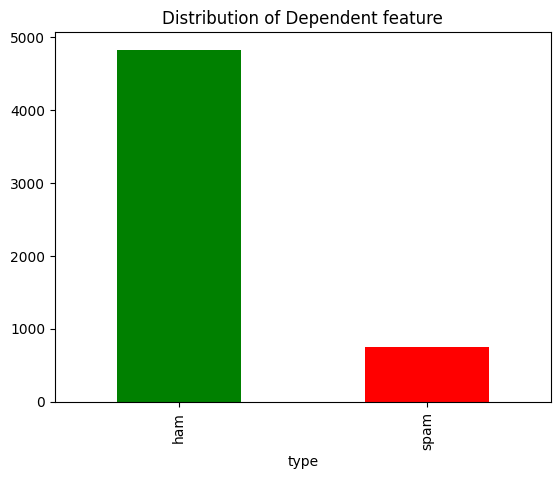

In [49]:
freq=pd.value_counts(df["type"])
freq.plot(kind="bar",color=["green","red"])
plt.title("Distribution of Dependent feature")
plt.show()

## Preprocessing of textual data

In [50]:
# 1. Tokenization

## "Hi my name is Anthony Gonsalves."

## To split up the words / characters

# ["my", 'Hi", "is", "Gonsalves", "Anthony", "name", "."]

In [51]:
## 2. Standalization.

## Convert all to lowercase.

## The
## the

In [52]:
## 3. Remove puntuations.

# Mail 1 : "I, Nigerian price need your help. Send money"

# Mail 2: "Meeting scheduled for 5 pm. Kindly revert"

In [53]:
## 4. Stop words: (Remove)

# These words (a, an, the, do, it, she, it etc) are called stop words

# Mail 1 : "I, Nigerian price need your help. Send money"

# Mail 2: "Meeting scheduled for 5 pm. Kindly revert"

In [54]:
import re,nltk
nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download("stopwords")

from nltk import word_tokenize,sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [55]:
def clean_tokenize_sentence(s):
  cleaned_sentance=""
  words=nltk.word_tokenize(s) # tokenization
  for word in words:
    #Convert it into lower case
    c_word=word.lower()
    # Remove punctuations
    c_word=re.sub(r'[^\w\s]',"",c_word)
    # Remove stop words
    if c_word != "" and c_word not in stopwords.words("english"):
      cleaned_sentance=cleaned_sentance+" "+c_word
  return (cleaned_sentance.strip())

df["cleaned_message"] = df["message"].apply(clean_tokenize_sentence)
display(df.head(10))

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...


In [56]:
ham = df[df['type'] == 'ham']
ham

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
...,...,...,...
5565,ham,Huh y lei...,huh lei
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [57]:
ham = ham['cleaned_message']
ham

,cleaned_message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
3,u dun say early hor u c already say
4,nah nt think goes usf lives around though
6,even brother like speak treat like aids patent
...,...
5565,huh lei
5568,ì_ b going esplanade fr home
5569,pity mood suggestions
5570,guy bitching acted like interested buying some...


In [58]:
ham=" ".join(ham)
ham

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah nt think goes usf lives around though even brother like speak treat like aids patent per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune gon na home soon nt want talk stuff anymore tonight k cried enough today searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times date sunday oh k watching eh u remember 2 spell name yes v naughty make v wet fine thatåõs way u feel thatåõs way gota b seriously spell name iûm going try 2 months ha ha joking ì_ pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho sucks mark getting worried knows sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left di

In [59]:
ham=ham.split()
ham

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'nt',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '9',
 'copy',
 'friends',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'nt',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'k',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 'name',
 'yes',


In [60]:
counter_ham=Counter(ham).most_common(20)
counter_ham

[('u', 1004),
 ('nt', 360),
 ('gt', 318),
 ('lt', 316),
 ('2', 309),
 ('get', 303),
 ('ok', 279),
 ('go', 248),
 ('got', 244),
 ('ur', 241),
 ('know', 236),
 ('like', 231),
 ('call', 231),
 ('good', 229),
 ('come', 227),
 ('time', 197),
 ('day', 192),
 ('love', 191),
 ('4', 172),
 ('going', 169)]

In [61]:
counter_spam=Counter(" ".join(df[df['type']=='spam']["cleaned_message"]).split()).most_common(20)
counter_spam

[('call', 347),
 ('free', 219),
 ('2', 176),
 ('u', 159),
 ('txt', 156),
 ('ur', 144),
 ('mobile', 123),
 ('4', 123),
 ('text', 121),
 ('stop', 116),
 ('claim', 113),
 ('reply', 104),
 ('prize', 92),
 ('get', 84),
 ('new', 69),
 ('send', 68),
 ('nokia', 65),
 ('urgent', 63),
 ('cash', 62),
 ('win', 60)]

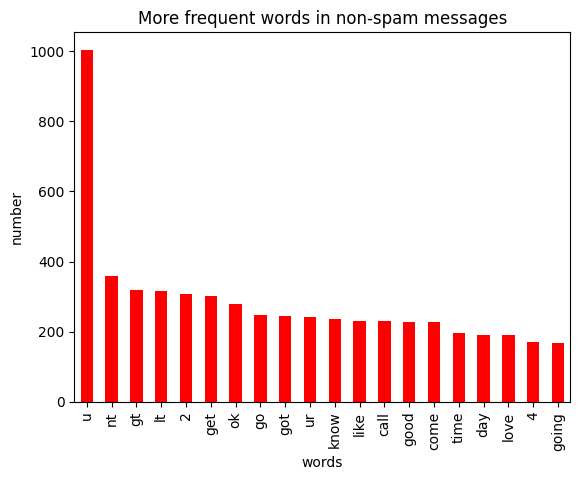

In [62]:
df_ham = pd.DataFrame(counter_ham)
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})
df_ham.plot.bar(legend = False,color="red")
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

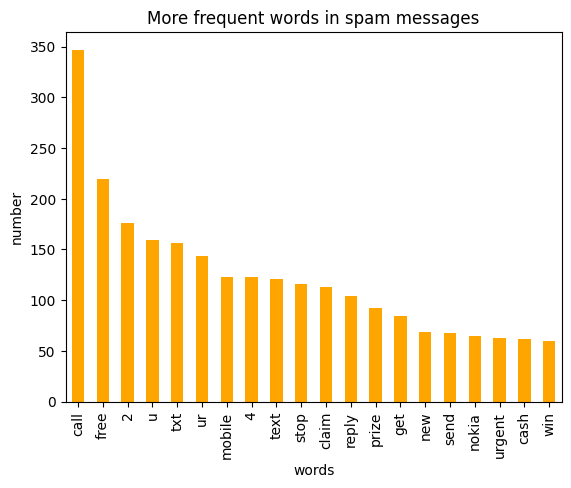

In [63]:
df_spam = pd.DataFrame(counter_spam)
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [64]:
df["type"]=df["type"].map({"spam":1,"ham":0})
df.head()

,type,message,cleaned_message
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though


In [65]:
from sklearn.model_selection import train_test_split
df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]


In [66]:
df_X_train

,cleaned_message
4281,u call
585,tell u headache want use 1 hour sick time
4545,never try alone take weight tear comes ur hear...
3034,raji pls favour pls convey birthday wishes nim...
2758,time iûm prob 3
...,...
3772,came hostel going sleep plz call class hrishi
5191,sorry call later
5226,prabha soryda realy frm heart sory
5390,nt joking seriously told


In [67]:
df_X_test

,cleaned_message
3245,funny fact nobody teaches volcanoes 2 erupt ts...
944,sent scores sophas secondary application schoo...
1044,know someone know fancies call 09058097218 fin...
2484,promise getting soon text morning let know mad...
812,congratulations ur awarded either å500 cd gift...
...,...
668,good evening ttyl
218,take exam march 3
5536,aiyah ok wat long got improve already wat
1657,one good partnership going take lead


In [70]:
from sklearn import feature_extraction
#Count vectorizer
f=feature_extraction.text.CountVectorizer()
f

CountVectorizer()

In [73]:
X_train=f.fit_transform(df_X_train)
X_test = f.transform(df_X_test)

In [74]:
print(X_train.shape,X_test.shape)

(4179, 7615) (1393, 7615)


In [76]:
X_train.toarray() # Sparse matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [77]:
params = {
    "alpha":[0.01,0.1,1,10]
}

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
clf = GridSearchCV(model,param_grid=params,cv=5)

In [81]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.1, 1, 10]})

In [84]:
print(clf.best_estimator_)

MultinomialNB(alpha=0.01)


In [83]:
model=clf.best_estimator_
model.fit(X_train,y_train)

MultinomialNB(alpha=0.01)

In [85]:
model.score(X_train,y_train)

0.9968892079444843

In [86]:
model.score(X_test,y_test)

0.9777458722182341